In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

#puxando os csv do site do governo
ocorrencia = pd.read_csv("ocorrencia.csv", sep=";", encoding= "latin1", dayfirst= True)
aeronave = pd.read_csv("aeronave.csv", sep=";", encoding= "latin1")
fator_contribuinte = pd.read_csv("fator_contribuinte.csv", sep=";", encoding= "latin1")
ocorrencia_tipo = pd.read_csv("ocorrencia_tipo.csv", sep=";", encoding= "latin1")
recomendacao = pd.read_csv("recomendacao.csv", sep=";", encoding= "latin1")

#transformando em dataframe

ocorrencia_df = pd.DataFrame(ocorrencia)
ocorrencia_df = ocorrencia_df[['codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_uf', 'ocorrencia_dia']]
ocorrencia_df

aeronave_df = pd.DataFrame(aeronave)   
aeronave_df = aeronave_df[['codigo_ocorrencia2', 'aeronave_fabricante', 'aeronave_motor_tipo', 'aeronave_fatalidades_total']]
aeronave_df

fator_contribuinte_df = pd.DataFrame(fator_contribuinte)
fator_contribuinte_df = fator_contribuinte_df[['codigo_ocorrencia3','fator_nome','fator_aspecto', 'fator_condicionante']]
fator_contribuinte_df

ocorrencia_tipo_df = pd.DataFrame(ocorrencia_tipo)
ocorrencia_tipo_df = ocorrencia_tipo_df[['codigo_ocorrencia1','ocorrencia_tipo']]
ocorrencia_tipo_df

recomendacao_df = pd.DataFrame(recomendacao)
recomendacao_df = recomendacao_df[['codigo_ocorrencia4','recomendacao_conteudo']]
recomendacao_df




,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante
0,85239,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE
1,85239,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL
2,85239,CONDIÇÕES METEOROLÓGICAS ADVERSAS,ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,***
3,85239,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL
4,85239,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL
...,...,...,...,...
8608,28335,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE
8609,28256,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE
8610,28256,PESSOAL DE APOIO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE
8611,28256,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE


C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_16360\730510660.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_por_ano['ocorrencia_dia'] = pd.to_datetime(acidentes_por_ano['ocorrencia_dia'], format='%d/%m/%Y')
C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_16360\730510660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_por_ano['ano'] = acidentes_por_ano['ocorrencia_dia'].dt.year
C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_16360\730510660.py:8: SettingWithCopy

Text(0, 0.5, 'Total de Acidentes')

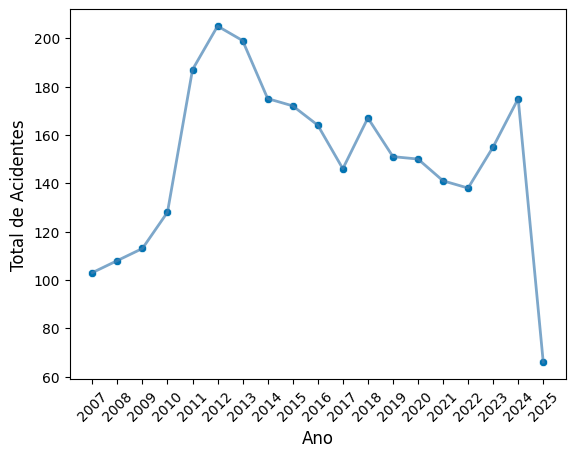

In [5]:
import matplotlib.pyplot as plt

#linha temporal de acidentes por ano

acidentes_por_ano = ocorrencia_df[ocorrencia_df['ocorrencia_classificacao'] == 'ACIDENTE']
acidentes_por_ano['ocorrencia_dia'] = pd.to_datetime(acidentes_por_ano['ocorrencia_dia'], format='%d/%m/%Y')
acidentes_por_ano['ano'] = acidentes_por_ano['ocorrencia_dia'].dt.year
acidentes_por_ano['ano'] = acidentes_por_ano['ano'].astype(str)

acidentes_por_ano = acidentes_por_ano.groupby('ano').size().reset_index(name='total_acidentes')
sns.set_palette("colorblind")

oi = sns.scatterplot(data = acidentes_por_ano, x = 'ano', y = 'total_acidentes') 
sns.lineplot(
    data=acidentes_por_ano, 
    x='ano', 
    y='total_acidentes',
    color='steelblue',
    linewidth=2,
    alpha=0.7)
oi.set_xticks(acidentes_por_ano['ano'])
oi.set_xticklabels(acidentes_por_ano['ano'].astype(int), rotation=45)

oi.set_xlabel("Ano", fontsize=12)
oi.set_ylabel("Total de Acidentes", fontsize=12)


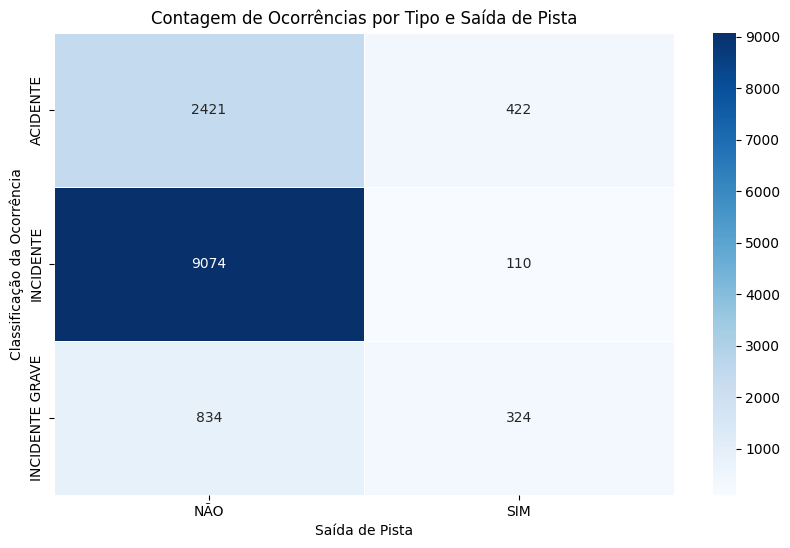

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ocorrencia.csv", sep=";", encoding="latin1")


cross_tab = pd.crosstab(
    index=df['ocorrencia_classificacao'],
    columns=df['ocorrencia_saida_pista'],
    values=df['total_aeronaves_envolvidas'],
    aggfunc='count' 
)

# Plotar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title("Contagem de Ocorrências por Tipo e Saída de Pista")
plt.xlabel("Saída de Pista")
plt.ylabel("Classificação da Ocorrência")
plt.show()

C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_16360\680173367.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes['ocorrencia_latitude'] = pd.to_numeric(acidentes['ocorrencia_latitude'], errors='coerce')
C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_16360\680173367.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes['ocorrencia_longitude'] = pd.to_numeric(acidentes['ocorrencia_longitude'], errors='coerce')
c:\Users\monteiro.ramos\AppData\Local\Programs\Python\Python313\Li

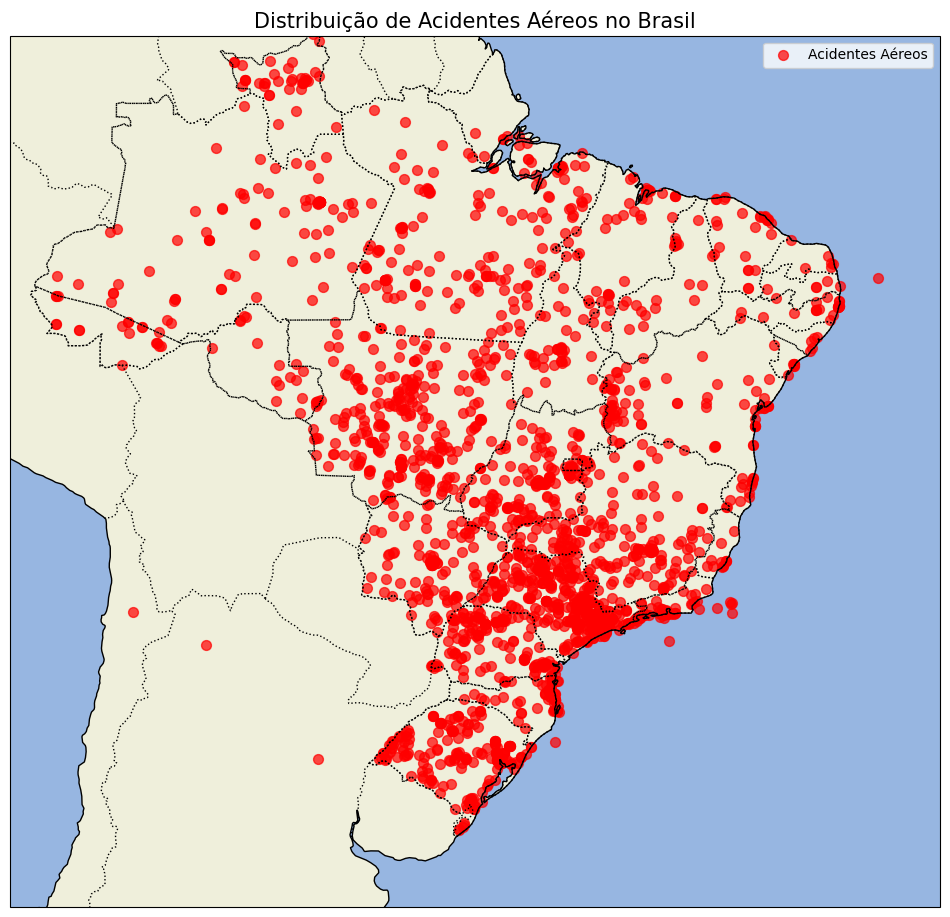

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Carregar os dados
df = pd.read_csv('ocorrencia.csv', sep=';', encoding='latin1')

# Filtrar acidentes com coordenadas válidas
acidentes = df[(df['ocorrencia_classificacao'] == 'ACIDENTE') & 
              (df['ocorrencia_latitude'].notna()) & 
              (df['ocorrencia_longitude'].notna())]

# Converter coordenadas para numérico
acidentes['ocorrencia_latitude'] = pd.to_numeric(acidentes['ocorrencia_latitude'], errors='coerce')
acidentes['ocorrencia_longitude'] = pd.to_numeric(acidentes['ocorrencia_longitude'], errors='coerce')

# Remover quaisquer valores NaN restantes
acidentes = acidentes.dropna(subset=['ocorrencia_latitude', 'ocorrencia_longitude'])

# Configurar o mapa
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75, -30, -35, 5])  # Ajuste para cobrir o Brasil

# Adicionar características do mapa
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Adicionar os acidentes como pontos
plt.scatter(acidentes['ocorrencia_longitude'], acidentes['ocorrencia_latitude'],
            color='red', s=50, alpha=0.7, transform=ccrs.PlateCarree(),
            label='Acidentes Aéreos')

# Adicionar título e legenda
plt.title('Distribuição de Acidentes Aéreos no Brasil', fontsize=15)
plt.legend()

# Mostrar o mapa
plt.show()

C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_16360\319484967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pi['ocorrencia_dia'] = pd.to_datetime(df_pi['ocorrencia_dia'], format='%d/%m/%Y')
C:\Users\monteiro.ramos\AppData\Local\Temp\ipykernel_16360\319484967.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pi['ano'] = df_pi['ocorrencia_dia'].dt.year


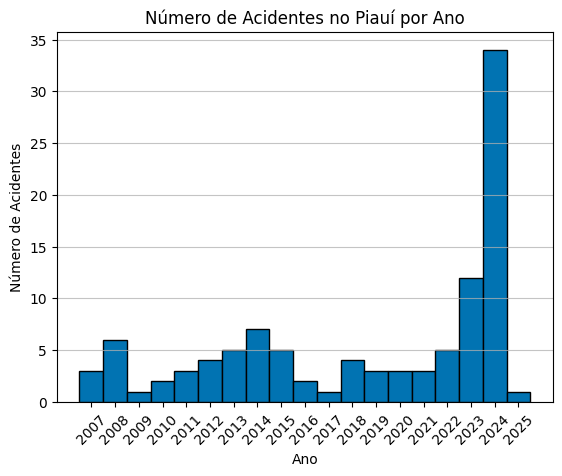

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o conjunto de dados
df = pd.read_csv('ocorrencia.csv', sep=';', encoding='latin1')

# Filtra as ocorrências para o estado do Piauí (PI)
df_pi = df[df['ocorrencia_uf'] == 'PI']

# Converte a coluna 'ocorrencia_dia' para o formato de data e extrai o ano
df_pi['ocorrencia_dia'] = pd.to_datetime(df_pi['ocorrencia_dia'], format='%d/%m/%Y')
df_pi['ano'] = df_pi['ocorrencia_dia'].dt.year

# Cria o histograma
plt.hist(df_pi['ano'], bins=range(df_pi['ano'].min(), df_pi['ano'].max() + 2), edgecolor='black', align='left')

# Adiciona rótulos e título
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.title('Número de Acidentes no Piauí por Ano')

# Ajusta os marcadores do eixo x para exibir cada ano
plt.xticks(range(df_pi['ano'].min(), df_pi['ano'].max() + 1))
plt.xticks(rotation=45)

# Adiciona uma grade para melhor visualização
plt.grid(axis='y', alpha=0.75)



Gráfico de dispersão corrigido e salvo como 'dispersao_fatores_recomendacoes_corrigido.png'


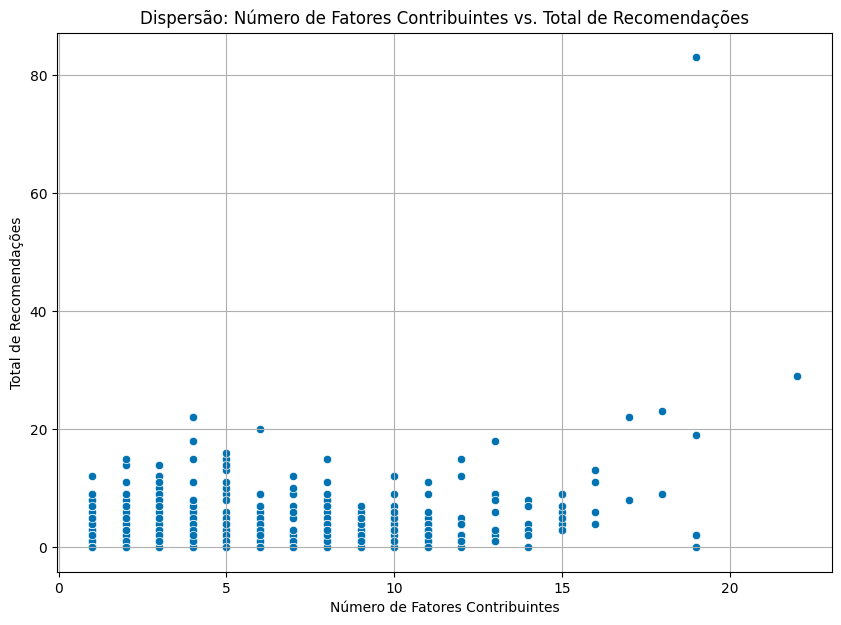

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Importa a biblioteca NumPy

# Carregar os datasets
df_ocorrencias = pd.read_csv('ocorrencia.csv', sep=';', encoding='latin1')
df_fatores = pd.read_csv('fator_contribuinte.csv', sep=';', encoding='latin1')

df_ocorrencias['total_recomendacoes'] = pd.to_numeric(df_ocorrencias['total_recomendacoes'], errors='coerce')

# Contar o número de fatores contribuintes por ocorrência
df_fatores_contagem = df_fatores.groupby('codigo_ocorrencia3')['fator_nome'].count().reset_index()
df_fatores_contagem = df_fatores_contagem.rename(columns={'fator_nome': 'numero_fatores'})

# Juntar (merge) os dataframes com base na chave comum 'codigo_ocorrencia3'
df_merged = pd.merge(df_ocorrencias, df_fatores_contagem, on='codigo_ocorrencia3')

# Selecionar as colunas de interesse para o gráfico de dispersão
df_scatter = df_merged[['numero_fatores', 'total_recomendacoes']].copy()

# Criar o gráfico de dispersão (scatterplot)
# A função irá ignorar automaticamente as linhas com valores NaN em 'total_recomendacoes'
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_scatter, x='numero_fatores', y='total_recomendacoes')

# Adicionar título e rótulos aos eixos
plt.title('Dispersão: Número de Fatores Contribuintes vs. Total de Recomendações')
plt.xlabel('Número de Fatores Contribuintes')
plt.ylabel('Total de Recomendações')
plt.grid(True)
